<a href="https://colab.research.google.com/github/012345-M/Data-anlayse-python-projects/blob/main/Copy_of_7_Machine_learning_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files             # import excel.csv file in google colab
uploaded= files.upload()

Saving tested.csv to tested.csv


In [ ]:
import pandas as pd                          # import the data set
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import io
titanic= pd.read_csv(io.BytesIO(uploaded['tested.csv']))
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
# describe the data set
titanic.shape

(418, 12)

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [ ]:
# identify the null values in teh data set
titanic.isnull().sum().sort_values(ascending=False)

Cabin          327
Age             86
Fare             1
Embarked         0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

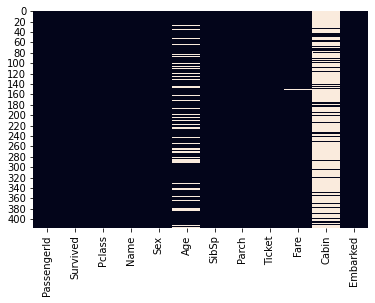

In [ ]:
sns.heatmap(titanic.isnull(), cbar=False)

In [ ]:
# Cabin, age and Fare has null values
round(titanic.isnull().sum().sort_values(ascending=False)/len(titanic)*100,1)

Cabin          78.2
Age            20.6
Fare            0.2
Embarked        0.0
Ticket          0.0
Parch           0.0
SibSp           0.0
Sex             0.0
Name            0.0
Pclass          0.0
Survived        0.0
PassengerId     0.0
dtype: float64

In [ ]:
# delete the fare rows because its only 0.2 percent missing 
titanic=titanic.dropna(subset=['Fare'])

In [ ]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          326
Embarked         0
dtype: int64

In [ ]:
# delecting the whole column cabins because it has 78% null values
titanic=titanic.drop(['Cabin'],axis=1)


In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


(array([16., 16., 71., 97., 43., 37., 25., 16.,  9.,  1.]),
 array([ 0.17 ,  7.753, 15.336, 22.919, 30.502, 38.085, 45.668, 53.251,
        60.834, 68.417, 76.   ]),
 <a list of 10 Patch objects>)

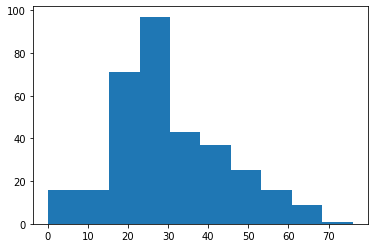

In [ ]:
# most of the null values are in age 20 to 35
plt.hist(titanic['Age'].dropna())

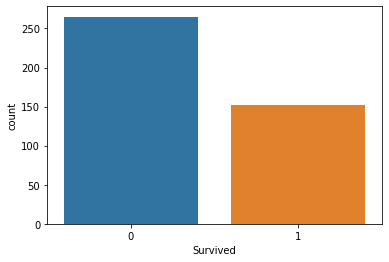

In [ ]:
# most of the people did not survive
sns.countplot(x='Survived', data=titanic)

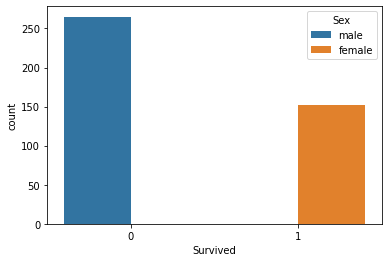

In [ ]:
# most of teh male did not survive compared to female
sns.countplot(x='Survived', hue='Sex', data=titanic)

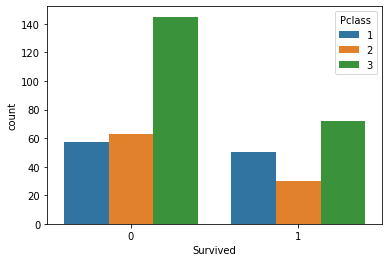

In [ ]:
# the cheapest class passengers from pclass 3 did not survive
sns.countplot(x='Survived',hue='Pclass',data=titanic)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


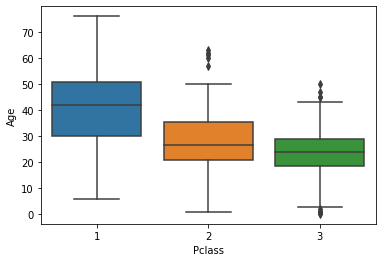

In [ ]:
# fill in teh missing values in age for every Pclass
sns.boxplot(titanic['Pclass'],titanic['Age'])
# most of the older pessengers are from pclass 1 and younger once are from pclass 3 

In [ ]:
# using pclass to catogories the age columns and fill in with average of each pclass
# pclass 1
titanic[titanic['Pclass']==1]['Age'].mean()
#pclass 2
titanic[titanic['Pclass']==2]['Age'].mean()
#pclass 3
titanic[titanic['Pclass']==3]['Age'].mean()

23.776413793103448

In [ ]:

def impute_missing_age(columns):

    age = columns[0]

    passenger_class = columns[1]

    

    if pd.isnull(age):

        if(passenger_class == 1):

            return titanic[titanic['Pclass'] == 1]['Age'].mean()

        elif(passenger_class == 2):

            return titanic[titanic['Pclass'] == 2]['Age'].mean()

        elif(passenger_class == 3):

            return titanic[titanic['Pclass'] == 3]['Age'].mean()

        

    else:

        return age        

In [ ]:
titanic['Age'] = titanic[['Age', 'Pclass']].apply(impute_missing_age, axis = 1)

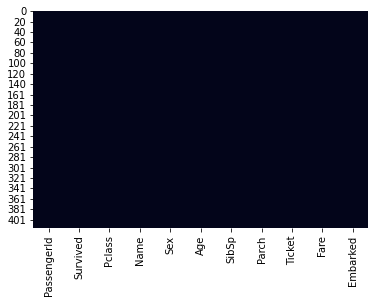

In [ ]:
# no more null values, could have used sklearn simple imputer aswell
sns.heatmap(titanic.isnull(),cbar=False)

In [ ]:
# change teh data type 
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [ ]:
titanic['Age']=titanic['Age'].astype('int64')
titanic['Fare']=titanic['Fare'].astype('int64')

In [ ]:
titanic.dtypes

PassengerId     int64
Survived        int64
Pclass          int64
Name           object
Sex            object
Age             int64
SibSp           int64
Parch           int64
Ticket         object
Fare            int64
Embarked       object
dtype: object

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34,0,0,330911,7,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9,Q
3,895,0,3,"Wirz, Mr. Albert",male,27,0,0,315154,8,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12,S


In [ ]:
# creating dummy values for categorivcal data convertion to nuremic
sex_data = pd.get_dummies(titanic['Sex'], drop_first = True)

embarked_data = pd.get_dummies(titanic['Embarked'], drop_first = True)

In [ ]:
# Add teh dummies in teh orginal data frame
titanic = pd.concat([titanic, pd.get_dummies(titanic['Sex'],titanic['Embarked'])], axis=1)

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,"0 Q\n1 S\n2 Q\n3 S\n4 S\n ..\n413 S\n414 C\n415 S\n416 S\n417 C\nName: Embarked, Length: 417, dtype: object_female","0 Q\n1 S\n2 Q\n3 S\n4 S\n ..\n413 S\n414 C\n415 S\n416 S\n417 C\nName: Embarked, Length: 417, dtype: object_male"
0,892,0,3,"Kelly, Mr. James",male,34,0,0,330911,7,Q,0,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7,S,1,0
2,894,0,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9,Q,0,1
3,895,0,3,"Wirz, Mr. Albert",male,27,0,0,315154,8,S,0,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12,S,1,0


In [ ]:
# remove unnecessary columns from teh data set for a better eveluation
titanic=titanic.drop(['Name','Sex','Embarked','Ticket'], axis=1)

In [ ]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       '0      Q\n1      S\n2      Q\n3      S\n4      S\n      ..\n413    S\n414    C\n415    S\n416    S\n417    C\nName: Embarked, Length: 417, dtype: object_female',
       '0      Q\n1      S\n2      Q\n3      S\n4      S\n      ..\n413    S\n414    C\n415    S\n416    S\n417    C\nName: Embarked, Length: 417, dtype: object_male'],
      dtype='object')

In [ ]:
# applying logistic regression to the data to find the crash survival rate prediction
# specify x independent values
x= titanic.drop(['Survived'], axis=1)
x.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,"0 Q\n1 S\n2 Q\n3 S\n4 S\n ..\n413 S\n414 C\n415 S\n416 S\n417 C\nName: Embarked, Length: 417, dtype: object_female","0 Q\n1 S\n2 Q\n3 S\n4 S\n ..\n413 S\n414 C\n415 S\n416 S\n417 C\nName: Embarked, Length: 417, dtype: object_male"
0,892,3,34,0,0,7,0,1
1,893,3,47,1,0,7,1,0
2,894,2,62,0,0,9,0,1
3,895,3,27,0,0,8,0,1
4,896,3,22,1,1,12,1,0


In [ ]:
# specify dependent values
y= titanic['Survived']
y.head()

0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64

In [ ]:
# split teh data to train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2) # 8020 split
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train) 
predictions= model.predict(x_test)      # model has been trained and ready for prediction

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
# see teh accuracy of teh model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        30

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

[[54  0]
 [ 0 30]]


In [ ]:
from sklearn.metrics import r2_score
y_pred= model.predict(x_test)
r2_score(y_test,y_pred)

1.0

In [ ]:
# Using KNN predict the survive rate for pessingers
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(x_train)
x_train= scaler.transform(x_train)
x_test= scaler.transform(x_test)
from sklearn.neighbors import KNeighborsClassifier
model= KNeighborsClassifier(n_neighbors=5)
model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix
predict= model.predict(x_test)
print(classification_report(y_test,predict))
print (confusion_matrix(y_test,predict))
print ('accurate score:',metrics.accuracy_score(y_test,predict))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

[[50  0]
 [ 0 34]]
accurate score: 1.0


In [ ]:
# find out the prefect value of K using error rates
error_rates= []
for i in np.arange(1, 101):
  new_model= KNeighborsClassifier(n_neighbors=i)
  new_model.fit(x_train,y_train)
  new_prediction= new_model.predict(x_test)
  error_rates.append(new_prediction != y_test)


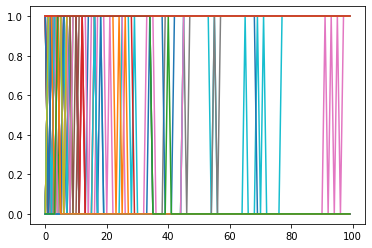

In [ ]:
plt.plot(error_rates)

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,"0 Q\n1 S\n2 Q\n3 S\n4 S\n ..\n413 S\n414 C\n415 S\n416 S\n417 C\nName: Embarked, Length: 417, dtype: object_female","0 Q\n1 S\n2 Q\n3 S\n4 S\n ..\n413 S\n414 C\n415 S\n416 S\n417 C\nName: Embarked, Length: 417, dtype: object_male"
0,892,0,3,34,0,0,7,0,1
1,893,1,3,47,1,0,7,1,0
2,894,0,2,62,0,0,9,0,1
3,895,0,3,27,0,0,8,0,1
4,896,1,3,22,1,1,12,1,0


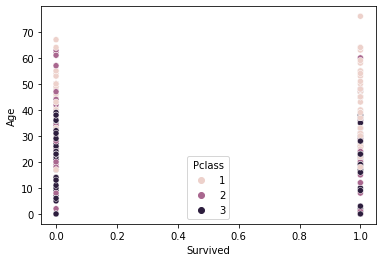

In [ ]:
# using K mean cluster to clasify the data into survive or not not survive
sns.scatterplot(x='Survived',y='Age',hue='Pclass',data=titanic)

In [ ]:
# decision tree prediction for survivals
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics
decision= tree.DecisionTreeClassifier()
decision=decision.fit(x_train,y_train)
y_predict= decision.predict(x_test)
print (classification_report(y_test,y_predict))
print (confusion_matrix(y_test,y_predict))
print ('accurate score:',metrics.accuracy_score(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

[[50  0]
 [ 0 34]]
accurate score: 1.0
